In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly as pltly
import plotly.express as px
import seaborn as sns
import scipy.stats as stats
import pandas as pd
from scipy.stats import skew, kurtosis
import statsmodels.api as sm

In [42]:
pip install pycountry pycountry-convert

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# ! git clone https://github.com/emmadefrang/MGT-499

fatal: destination path 'MGT-499' already exists and is not an empty directory.


In [141]:
# df = pd.read_csv (r"/content/MGT-499/SOC-project/df_luc_clean.csv")

df = pd.read_csv (r"C:\Users\defrang\MGT_499\SOC-project\df_luc_clean.csv")
df.head()

,ID,IDstudy,plotID,country,region,climate,bedrock,soil_type,temperature,precipitation_mm,...,%silt,%sand,ph,SOC_Mg_ha,Period,delta_SOC_Mgha,%delta_SOC,csp_rank,csp_change,luc_rank
0,1,1,1,Brazil,SaoPaulo,Tropical,Sandstone,Ferralsols,21.0,1500.0,...,9.333333,68.766667,NaN,29.446667,0,NaN,NaN,2.0,NaN,NaN
1,1,1,1,Brazil,SaoPaulo,Tropical,Sandstone,Ferralsols,21.0,1500.0,...,2.733333,81.800000,NaN,21.386667,1,-8.060000,-27.371519,2.0,0.0,3.0
2,5,1,2,Brazil,SaoPaulo,Tropical,Sandstone,Luvisol,21.0,1500.0,...,10.400000,42.766667,NaN,32.830000,0,NaN,NaN,2.0,NaN,NaN
3,5,1,2,Brazil,SaoPaulo,Tropical,Sandstone,Luvisol,21.0,1500.0,...,10.533333,47.666667,NaN,24.546667,1,-8.283333,-25.230988,2.0,0.0,3.0
4,9,1,3,Brazil,SaoPaulo,Tropical,Granite,Ferralsols,21.0,1500.0,...,8.000000,62.566667,NaN,31.370000,0,NaN,NaN,1.0,NaN,NaN


In [66]:
df.columns

Index(['ID', 'IDstudy', 'plotID', 'country', 'region', 'climate', 'bedrock',
       'soil_type', 'temperature', 'precipitation_mm', 'Latitud', 'Longitud',
       'year_measure', 'TYPE_CHANGE', 'years_since_luc', 'CROP_current',
       'CROP_type', 'land_use', 'N_measured', 'soil_from_cm', 'soil_to_cm',
       'depth_midpoint', 'bulk_density_Mg_m3', '%clay', '%silt', '%sand', 'ph',
       'SOC_Mg_ha', 'Period', 'delta_SOC_Mgha', '%delta_SOC', 'csp_rank',
       'csp_change', 'luc_rank'],
      dtype='object')

In [189]:
#Create a dataframe with the LUC ranks not in pivot form (so columns labeled with 'previous' or 'current')

df1 = pd.read_csv (r"/content/MGT-499/SOC-project/df_luc_clean.csv")



FileNotFoundError: [Errno 2] No such file or directory: '/content/MGT-499/SOC-project/df_luc_clean.csv'

array([[1, 1, 1, ..., nan, nan, 'Brazil'],
       [1, 1, 1, ..., 0.0, 3.0, 'Brazil'],
       [5, 1, 2, ..., nan, nan, 'Brazil'],
       ...,
       [1584, 179, 706, ..., 2.0, 5.0, 'India'],
       [1591, 179, 707, ..., nan, nan, 'India'],
       [1591, 179, 707, ..., 2.0, 5.0, 'India']], dtype=object)

In [67]:
#Rename %clay, %silt, %sand columns to just clay, silt, sand
df.rename(columns = {'precipitation_mm': 'precipitation', '%clay': 'clay', '%silt': 'silt', '%sand': 'sand'}, inplace=True)

In [68]:
#How many observations are we missing pH for

print('Total observations', df.__len__()) 
print('Missing pH observations', df['ph'].isnull().sum())

Total observations 854
Missing pH observations 577


In [69]:
#Only keep the rows where we have a value for pH for both current and previous. We will call this a new dataframe so we can test its performance
#against the model that will neglect pH

df_ph = df[(~df['ph'].isna())]

print(df_ph.shape)

combined_df = df_ph

(277, 34)


In [71]:
#Are there any rows where SOC_Mg_ha is missing?
print('Missing SOC_Mg_ha observations', combined_df['SOC_Mg_ha'].isnull().sum())

#Are there any rows where csp_rank is missing?
print('Missing csp_rank observations', combined_df['csp_rank'].isnull().sum())

Missing SOC_Mg_ha observations 0
Missing csp_rank observations 9


In [102]:
# Run a basic regression model to assess the relationship between SOC_Mg_ha and csp_rank
#Remove the entire row if csp rank is missing

combined_df = combined_df[(~combined_df['csp_rank'].isna())]

#We will also add fixed effects of the climate and period to the model
X = combined_df['csp_rank']
y = combined_df['SOC_Mg_ha']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SOC_Mg_ha   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     4.394
Date:                Mon, 25 Nov 2024   Prob (F-statistic):             0.0383
Time:                        16:32:28   Log-Likelihood:                -522.63
No. Observations:                 113   AIC:                             1049.
Df Residuals:                     111   BIC:                             1055.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.5522      5.458      5.781      0.0

In [ ]:
import statsmodels.api as sm
import pandas as pd


# Filter out rows with missing `csp_rank`
combined_df = combined_df[~combined_df['csp_rank'].isna()]

# Define the dependent variable (target) and independent variable
y = combined_df['SOC_Mg_ha']

# Include the independent variable and fixed effects
X = combined_df[['csp_rank']]  # Start with `csp_rank`

# Add fixed effects for `climate` and `period`
X = pd.get_dummies(combined_df[['climate', 'Period']], drop_first=True).join(X)

X = X.dropna()  # Drop rows with missing values in X
y = y[X.index]  # Align y to X

#Check dtypes
print(X.dtypes)

print(y.dtypes)

X = X.astype(float)  # Convert all columns in X to float

# Add a constant term
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())




climate_Mediterranean       bool
climate_Temperate           bool
climate_Tropical            bool
Period_1                    bool
csp_rank                 float64
dtype: object
float64
                            OLS Regression Results                            
Dep. Variable:              SOC_Mg_ha   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.136
Method:                 Least Squares   F-statistic:                     4.512
Date:                Mon, 25 Nov 2024   Prob (F-statistic):           0.000903
Time:                        16:32:08   Log-Likelihood:                -514.01
No. Observations:                 113   AIC:                             1040.
Df Residuals:                     107   BIC:                             1056.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       

In [121]:
# Define your feature set (X) and target variable (y)
features = ['temperature', 'precipitation', 'clay', 'silt', 'sand', 'ph']

#Drop rows with missing feature values
combined_df = combined_df.dropna(subset=features)
print(combined_df.head())
X = combined_df[features]
y = combined_df['SOC_Mg_ha']

    ID  IDstudy  plotID  country       region    climate bedrock  \
10  61        6      15  Germany  Ihinger_Hof  Temperate     NaN   
11  61        6      15  Germany  Ihinger_Hof  Temperate     NaN   
12  62        6      16  Germany  Ihinger_Hof  Temperate     NaN   
13  62        6      16  Germany  Ihinger_Hof  Temperate     NaN   
14  63        6      17  Germany  Ihinger_Hof  Temperate     NaN   

         soil_type  temperature  precipitation  ...  sand    ph  SOC_Mg_ha  \
10  Haplic_Luvisol          9.1          714.0  ...   2.4  7.38  13.366667   
11  Haplic_Luvisol          9.1          714.0  ...   2.4  7.38  14.166667   
12  Haplic_Luvisol          9.1          714.0  ...   2.4  7.38  13.366667   
13  Haplic_Luvisol          9.1          714.0  ...   2.4  7.38  14.133333   
14  Haplic_Luvisol          9.1          714.0  ...   2.4  7.38  13.366667   

   Period  delta_SOC_Mgha %delta_SOC csp_rank csp_change  luc_rank  continent  
10      0             NaN        NaN      

In [123]:
#Are there any rows where any of the features are missing?
features = ['temperature', 'precipitation', 'clay', 'silt', 'sand', 'ph']

for feature in features:
    print('Missing', feature, 'observations', combined_df[feature].isnull().sum())

Missing temperature observations 0
Missing precipitation observations 0
Missing clay observations 0
Missing silt observations 0
Missing sand observations 0
Missing ph observations 0


In [126]:
# Filter out rows with missing values in the required columns
required_columns = ['csp_rank', 'SOC_Mg_ha', 'silt', 'sand', 'clay', 'temperature', 'precipitation', 'ph']
combined_df = combined_df.dropna(subset=required_columns)

# Include fixed effects and feature variables
fixed_effects = pd.get_dummies(combined_df[['climate', 'Period']], drop_first=True)
features = combined_df[['csp_rank', 'silt', 'sand', 'clay', 'temperature', 'precipitation', 'ph']]
X = pd.concat([fixed_effects, features], axis=1)

# Ensure all columns are numeric
X = X.astype(float)

# Define the target variable
y = combined_df['SOC_Mg_ha']

# Add a constant for the intercept
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Display the summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:              SOC_Mg_ha   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.439
Method:                 Least Squares   F-statistic:                     8.978
Date:                Mon, 25 Nov 2024   Prob (F-statistic):           5.68e-11
Time:                        16:42:19   Log-Likelihood:                -486.29
No. Observations:                 113   AIC:                             996.6
Df Residuals:                     101   BIC:                             1029.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   231.55

In [108]:
import pandas as pd
import pycountry
import pycountry_convert as pc

def get_continent(country_name):
    try:
        # Get the Alpha-2 country code
        country_code = pycountry.countries.lookup(country_name).alpha_2
        # Convert Alpha-2 country code to continent code
        continent_code = pc.country_alpha2_to_continent_code(country_code)
        # Map continent codes to names
        continent_dict = {
            'AF': 'Africa',
            'AS': 'Asia',
            'EU': 'Europe',
            'NA': 'North America',
            'SA': 'South America',
            'OC': 'Oceania',
            'AN': 'Antarctica'
        }
        return continent_dict[continent_code]
    except:
        return 'Unknown'

# Example usage on your DataFrame
# Assuming your DataFrame is called combined_df with a 'country' column
combined_df['continent'] = combined_df['country'].apply(get_continent)

# Display the first few rows to verify
print(combined_df[['country', 'continent']].head())




    country continent
10  Germany    Europe
11  Germany    Europe
12  Germany    Europe
13  Germany    Europe
14  Germany    Europe


In [187]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

#We will used country and climate as fixed effects by creating dummy variables for them

fixed_effects = pd.get_dummies(combined_df[['country', 'climate', 'Period']], drop_first=True)

features = combined_df[['csp_rank', 'silt', 'sand', 'clay', 'temperature', 'precipitation', 'ph']]

X = pd.concat([fixed_effects, features], axis=1)

# Ensure all columns are numeric
X = X.astype(float)

# Define the target variable
y = combined_df['SOC_Mg_ha']

# Add a constant for the intercept
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

print(model.summary())



                            OLS Regression Results                            
Dep. Variable:              SOC_Mg_ha   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     29.74
Date:                Mon, 25 Nov 2024   Prob (F-statistic):           1.96e-28
Time:                        17:23:21   Log-Likelihood:                -434.97
No. Observations:                 113   AIC:                             897.9
Df Residuals:                      99   BIC:                             936.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   136.52

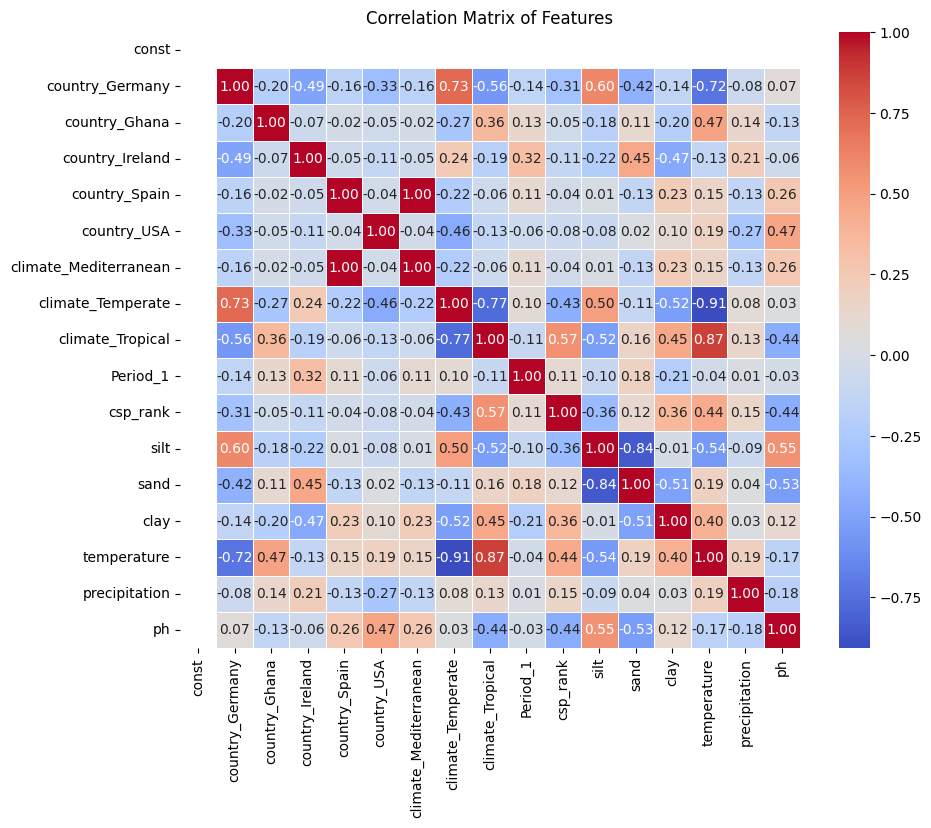

In [188]:
# Compute the correlation matrix for the features in X
correlation_matrix = X.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Features")
plt.show()


In [110]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Assume 'combined_df' is your cleaned DataFrame with relevant variables
# Create a cateforical variable for 'continent'
combined_df['continent'] = combined_df['continent'].astype('category')

#Let's also try to account for the fixed effects of different climate types
# Convert 'climate' to a categorical variable
combined_df['climate'] = combined_df['climate'].astype('category')

# Define the regression formula with fixed effects (country) and other predictors
formula = 'SOC_Mg_ha ~ temperature + precipitation + clay + silt + sand + C(continent) + depth_midpoint + C(climate)'

# Fit the model using Ordinary Least Squares (OLS)
model = smf.ols(formula=formula, data=combined_df).fit()

# Print the summary of the model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:              SOC_Mg_ha   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.451
Method:                 Least Squares   F-statistic:                     10.22
Date:                Mon, 25 Nov 2024   Prob (F-statistic):           9.82e-12
Time:                        16:36:51   Log-Likelihood:                -485.61
No. Observations:                 113   AIC:                             993.2
Df Residuals:                     102   BIC:                             1023.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [111]:
print(df_ph.head())

    ID  IDstudy  plotID     country         region    climate   bedrock  \
8   26        4       8  New_Zeland  Bay_of_Plenty  Temperate  Volcanic   
9   26        4       8  New_Zeland  Bay_of_Plenty  Temperate  Volcanic   
10  61        6      15     Germany    Ihinger_Hof  Temperate       NaN   
11  61        6      15     Germany    Ihinger_Hof  Temperate       NaN   
12  62        6      16     Germany    Ihinger_Hof  Temperate       NaN   

         soil_type  temperature  precipitation  ...  silt  sand    ph  \
8   Mollic_Andosol         14.5          138.0  ...   NaN   NaN  5.72   
9   Mollic_Andosol         14.5          138.0  ...   NaN   NaN  6.00   
10  Haplic_Luvisol          9.1          714.0  ...  74.8   2.4  7.38   
11  Haplic_Luvisol          9.1          714.0  ...  74.8   2.4  7.38   
12  Haplic_Luvisol          9.1          714.0  ...  74.8   2.4  7.38   

    SOC_Mg_ha  Period delta_SOC_Mgha %delta_SOC csp_rank  csp_change  luc_rank  
8   90.872727       0        

In [127]:
#Let's repeat the same process but this time we will exclude pH as a predictor variable 

combined_df_ph = df

# Filter out rows with missing values in the required columns
required_columns = ['csp_rank', 'SOC_Mg_ha', 'silt', 'sand', 'clay', 'temperature', 'precipitation']
combined_df = combined_df.dropna(subset=required_columns)

# Include fixed effects and feature variables
fixed_effects = pd.get_dummies(combined_df[['climate', 'Period']], drop_first=True)
features = combined_df[['csp_rank', 'silt', 'sand', 'clay', 'temperature', 'precipitation']]
X = pd.concat([fixed_effects, features], axis=1)

# Ensure all columns are numeric
X = X.astype(float)

# Define the target variable
y = combined_df['SOC_Mg_ha']

# Add a constant for the intercept
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:              SOC_Mg_ha   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     9.866
Date:                Mon, 25 Nov 2024   Prob (F-statistic):           2.23e-11
Time:                        16:42:40   Log-Likelihood:                -486.59
No. Observations:                 113   AIC:                             995.2
Df Residuals:                     102   BIC:                             1025.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   236.05

Until here, we have looked at absolute SOC stocks as a function of various variables. Now, we will use this same strategy, but with relative change in SOC with time

In [158]:
df_delta = df.copy()

df_delta

,ID,IDstudy,plotID,country,region,climate,bedrock,soil_type,temperature,precipitation_mm,...,%silt,%sand,ph,SOC_Mg_ha,Period,delta_SOC_Mgha,%delta_SOC,csp_rank,csp_change,luc_rank
0,1,1,1,Brazil,SaoPaulo,Tropical,Sandstone,Ferralsols,21.0,1500.0,...,9.333333,68.766667,NaN,29.446667,0,NaN,NaN,2.0,NaN,NaN
1,1,1,1,Brazil,SaoPaulo,Tropical,Sandstone,Ferralsols,21.0,1500.0,...,2.733333,81.800000,NaN,21.386667,1,-8.060000,-27.371519,2.0,0.0,3.0
2,5,1,2,Brazil,SaoPaulo,Tropical,Sandstone,Luvisol,21.0,1500.0,...,10.400000,42.766667,NaN,32.830000,0,NaN,NaN,2.0,NaN,NaN
3,5,1,2,Brazil,SaoPaulo,Tropical,Sandstone,Luvisol,21.0,1500.0,...,10.533333,47.666667,NaN,24.546667,1,-8.283333,-25.230988,2.0,0.0,3.0
4,9,1,3,Brazil,SaoPaulo,Tropical,Granite,Ferralsols,21.0,1500.0,...,8.000000,62.566667,NaN,31.370000,0,NaN,NaN,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
849,1577,179,705,India,Karnal,Tropical,NaN,Typic_Natrustalf,24.0,735.0,...,21.845000,NaN,7.360,18.000000,1,2.250000,14.285714,2.0,1.0,4.0
850,1584,179,706,India,Karnal,Tropical,NaN,Typic_Natrustalf,24.0,735.0,...,27.120000,NaN,7.745,15.750000,0,NaN,NaN,1.0,NaN,NaN
851,1584,179,706,India,Karnal,Tropical,NaN,Typic_Natrustalf,24.0,735.0,...,25.870000,NaN,7.585,26.850000,1,11.100000,70.476190,3.0,2.0,5.0
852,1591,179,707,India,Karnal,Tropical,NaN,Typic_Natrustalf,24.0,735.0,...,27.120000,NaN,7.745,15.750000,0,NaN,NaN,1.0,NaN,NaN


In [ ]:
#First, we need to come up with a new dataframe that only contains deltas
#Calculate the change in silt, sand, clay, and pH numbers from previous to current

#We will group the data by ID, and then subtract the previous value from the current value to obtain the delta

df_delta['silt_delta'] = df_delta.groupby('ID')['%silt'].diff()
df_delta['sand_delta'] = df_delta.groupby('ID')['%sand'].diff()
df_delta['clay_delta'] = df_delta.groupby('ID')['%clay'].diff()
df_delta['ph_delta'] = df_delta.groupby('ID')['ph'].diff()

In [166]:
df_delta.head()

,ID,IDstudy,plotID,country,region,climate,bedrock,soil_type,temperature,precipitation_mm,...,Period,delta_SOC_Mgha,%delta_SOC,csp_rank,csp_change,luc_rank,silt_delta,sand_delta,clay_delta,ph_delta
0,1,1,1,Brazil,SaoPaulo,Tropical,Sandstone,Ferralsols,21.0,1500.0,...,0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,1,Brazil,SaoPaulo,Tropical,Sandstone,Ferralsols,21.0,1500.0,...,1,-8.060000,-27.371519,2.0,0.0,3.0,-6.600000,13.033333,-6.4,NaN
2,5,1,2,Brazil,SaoPaulo,Tropical,Sandstone,Luvisol,21.0,1500.0,...,0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
3,5,1,2,Brazil,SaoPaulo,Tropical,Sandstone,Luvisol,21.0,1500.0,...,1,-8.283333,-25.230988,2.0,0.0,3.0,0.133333,4.900000,-5.0,NaN
4,9,1,3,Brazil,SaoPaulo,Tropical,Granite,Ferralsols,21.0,1500.0,...,0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [173]:
#We will run a mlr model with the delta as features, including the luc_rank as a feature

#We will include fixed effects of climate and period

# Filter out rows with missing values in the required columns
required_columns = ['%delta_SOC', 'luc_rank', 'silt_delta', 'sand_delta', 'clay_delta', 'ph_delta', 'climate', 'Period']

# Include fixed effects and feature variables
fixed_effects = pd.get_dummies(df_delta[['climate', 'Period']], drop_first=True)
features = df_delta[['luc_rank', 'silt_delta', 'sand_delta', 'clay_delta', 'ph_delta']]
X = pd.concat([fixed_effects, features], axis=1)

# Ensure all columns are numeric
X = X.astype(float)

#Drop all NaN X values
X = X.dropna()

# Define the target variable
y = df_delta['%delta_SOC']

#Drop all NaN y values
y = y[X.index]


# Add a constant for the intercept
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             %delta_SOC   R-squared:                       0.428
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     3.529
Date:                Mon, 25 Nov 2024   Prob (F-statistic):            0.00616
Time:                        16:58:49   Log-Likelihood:                -176.36
No. Observations:                  41   AIC:                             368.7
Df Residuals:                      33   BIC:                             382.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Period                  -34.90

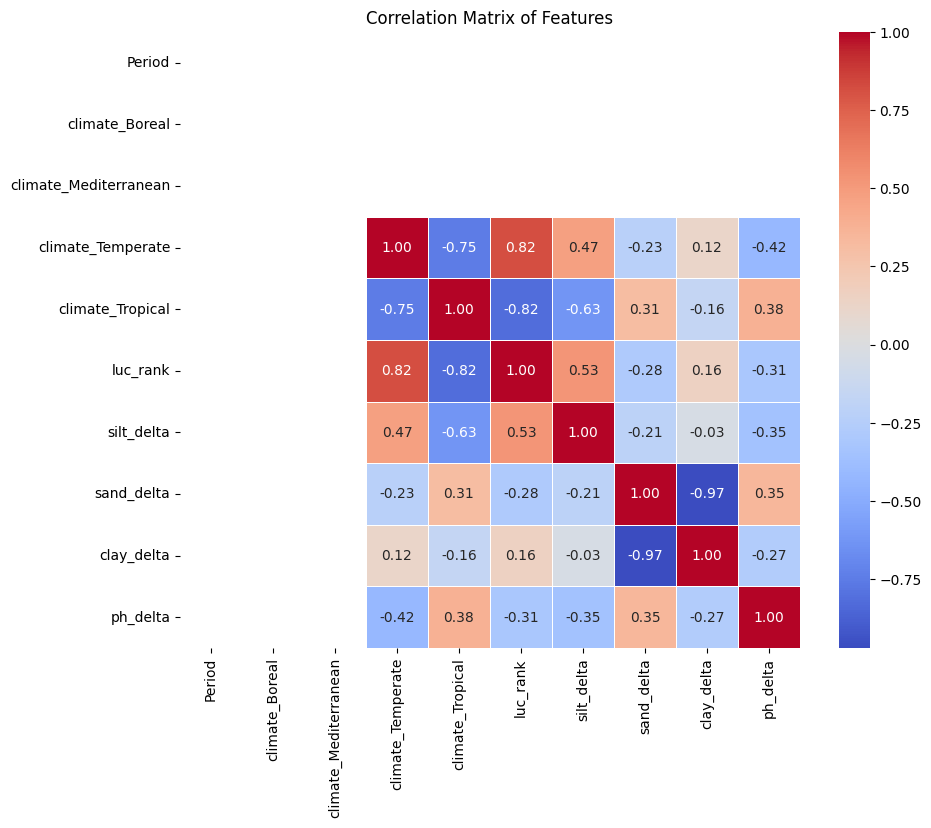

In [ ]:
#Let's observe if there are colinearity issues between the features

import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix for the features in X
correlation_matrix = X.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Features")
plt.show()



Based on the strong reverse correlation of delta sand and delta clay, and domain knowledge (sand and clay make up the majority of soil, so when one goes up, the other naturally goes down), tells us that we should drop one of the two variables to reduce colinearity issues. We will drop clay delta. 

In general, it should be observed that the explanatory power of this model is very low (only R2 = 0.2). That means that we are not capturing the underlying variables through our current feature set. 

                            OLS Regression Results                            
Dep. Variable:             %delta_SOC   R-squared:                       0.329
Model:                            OLS   Adj. R-squared:                  0.228
Method:                 Least Squares   F-statistic:                     3.262
Date:                Mon, 25 Nov 2024   Prob (F-statistic):             0.0105
Time:                        17:15:58   Log-Likelihood:                -208.57
No. Observations:                  47   AIC:                             431.1
Df Residuals:                      40   BIC:                             444.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Period                  -43.79

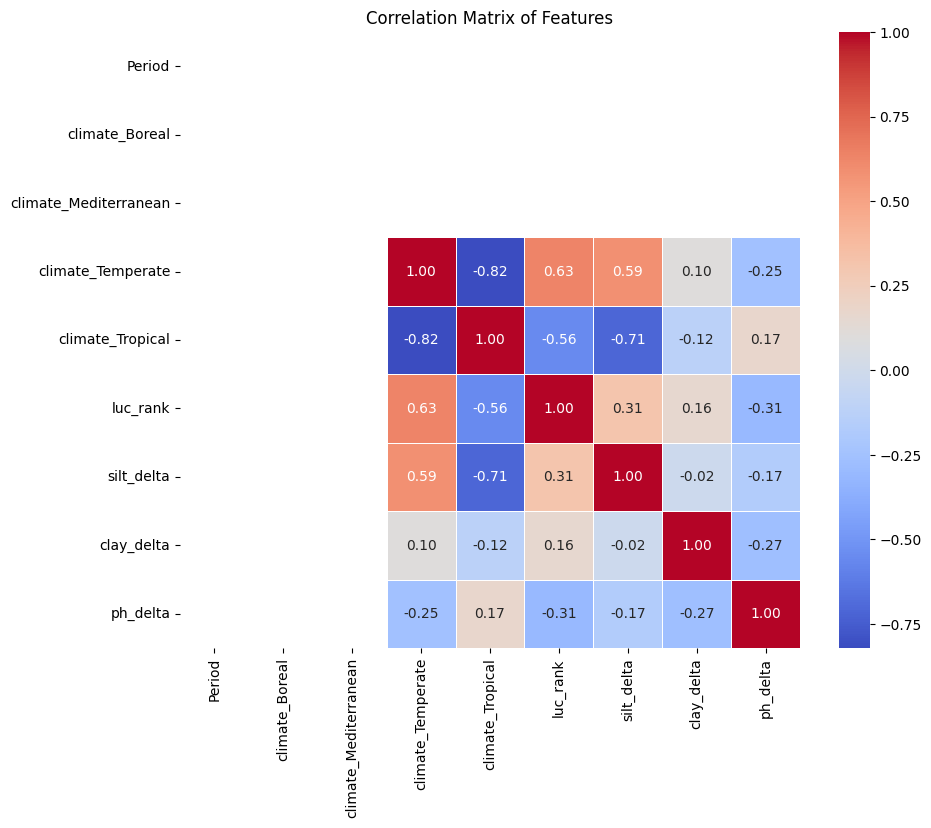

In [177]:
#We will run a mlr model with the delta as features, including the luc_rank as a feature

#We will include fixed effects of climate and period

# Filter out rows with missing values in the required columns
required_columns = ['%delta_SOC', 'luc_rank', 'clay_delta', 'ph_delta', 'climate', 'Period']

# Include fixed effects and feature variables
fixed_effects = pd.get_dummies(df_delta[['climate', 'Period']], drop_first=True)
features = df_delta[['luc_rank', 'silt_delta', 'clay_delta', 'ph_delta']]
X = pd.concat([fixed_effects, features], axis=1)

# Ensure all columns are numeric
X = X.astype(float)

#Drop all NaN X values
X = X.dropna()

# Define the target variable
y = df_delta['%delta_SOC']

#Drop all NaN y values
y = y[X.index]


# Add a constant for the intercept
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

print(model.summary())

# Compute the correlation matrix for the features in X
correlation_matrix = X.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Features")
plt.show()